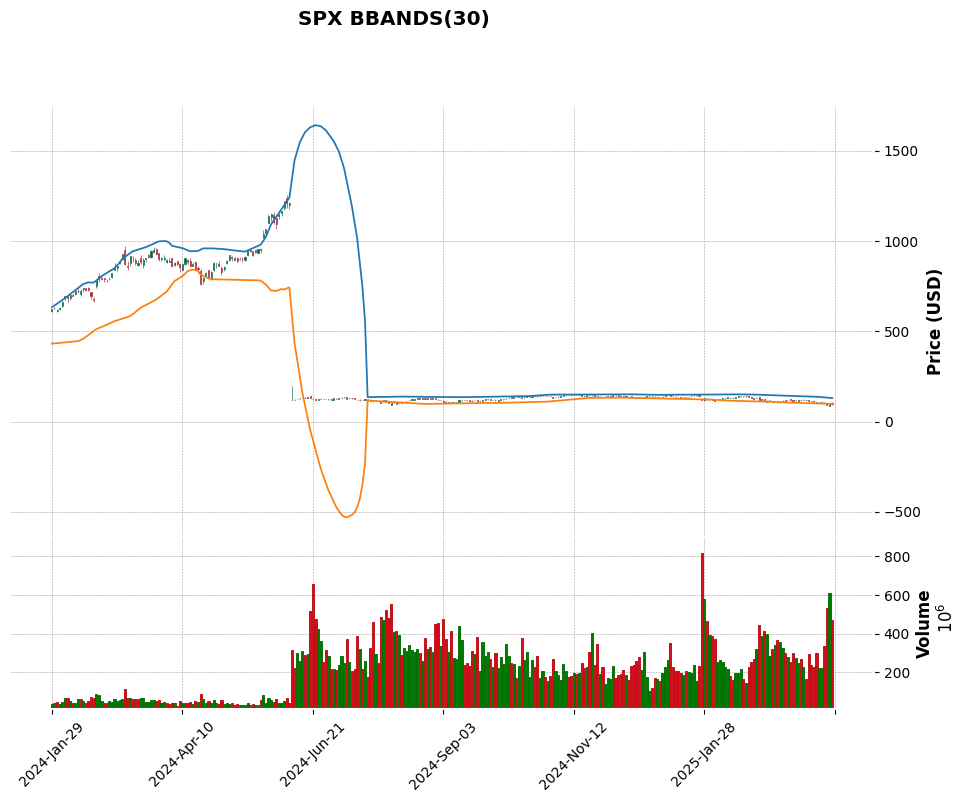

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf
from finta import TA

ohlc = pd.read_csv("../csv/NVDA_from_2021.csv",index_col="timestamp",parse_dates=True)

bbands = TA.BBANDS(ohlc, 30)

# cherry pick what to show on the chart
bands_plot = pd.concat([bbands.BB_UPPER, bbands.BB_LOWER], axis=1)

apd = mpf.make_addplot(bands_plot.tail(300))


mpf.plot(ohlc.tail(300), type='candle', style='charles',
        title='SPX BBANDS(30)',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.5,
        addplot=apd
        )

timestamp
2020-01-02 05:00:00+00:00           NaN
2020-01-03 05:00:00+00:00           NaN
2020-01-06 05:00:00+00:00           NaN
2020-01-07 05:00:00+00:00           NaN
2020-01-08 05:00:00+00:00           NaN
                                ...    
2025-04-02 04:00:00+00:00    115.458000
2025-04-03 04:00:00+00:00    114.539333
2025-04-04 04:00:00+00:00    112.715333
2025-04-07 04:00:00+00:00    111.256000
2025-04-08 04:00:00+00:00    109.980667
Name: 15 period SMA, Length: 1324, dtype: float64

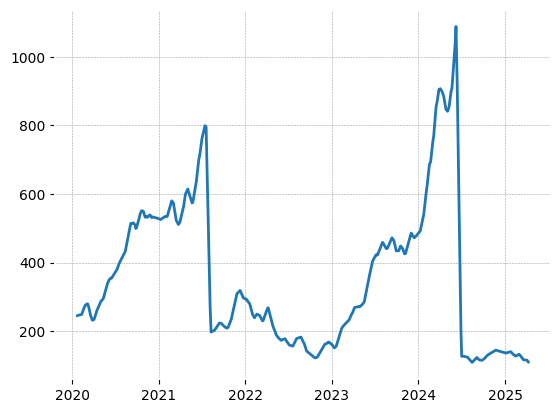

In [2]:
sma = TA.SMA(ohlc,15)
plt.plot(sma)
sma

In [3]:
rsi = TA.RSI(ohlc)

In [4]:
macd = TA.MACD(ohlc)
macd.tail(10)

,MACD,SIGNAL
timestamp,,
2025-03-26 04:00:00+00:00,-2.415055,-3.169630
2025-03-27 04:00:00+00:00,-2.747865,-3.085277
2025-03-28 04:00:00+00:00,-3.117698,-3.091761
2025-03-31 04:00:00+00:00,-3.474829,-3.168375
2025-04-01 04:00:00+00:00,-3.573837,-3.249467
2025-04-02 04:00:00+00:00,-3.589142,-3.317402
2025-04-03 04:00:00+00:00,-4.247866,-3.503495
2025-04-04 04:00:00+00:00,-5.313045,-3.865405
2025-04-07 04:00:00+00:00,-5.821398,-4.256604


In [5]:
sma_long = TA.SMA(ohlc,200)
sma_long.tail(20)

timestamp
2025-03-12 04:00:00+00:00    183.973975
2025-03-13 04:00:00+00:00    179.361925
2025-03-14 04:00:00+00:00    174.646825
2025-03-17 04:00:00+00:00    169.549425
2025-03-18 04:00:00+00:00    164.385325
2025-03-19 04:00:00+00:00    159.447925
2025-03-20 04:00:00+00:00    154.558925
2025-03-21 04:00:00+00:00    149.397425
2025-03-24 04:00:00+00:00    144.182625
2025-03-25 04:00:00+00:00    138.664075
2025-03-26 04:00:00+00:00    133.182975
2025-03-27 04:00:00+00:00    127.695725
2025-03-28 04:00:00+00:00    127.635125
2025-03-31 04:00:00+00:00    127.572475
2025-04-01 04:00:00+00:00    127.497225
2025-04-02 04:00:00+00:00    127.401275
2025-04-03 04:00:00+00:00    127.250875
2025-04-04 04:00:00+00:00    127.067525
2025-04-07 04:00:00+00:00    126.877825
2025-04-08 04:00:00+00:00    126.705425
Name: 200 period SMA, dtype: float64

In [6]:
ohlc["sma15"] = sma
ohlc["sma200"] = sma_long
ohlc["rsi"] = rsi
ohlc["macd"] = macd["MACD"]
ohlc["macd_signal"] = macd["SIGNAL"]
ohlc.tail(10)

,symbol,open,high,low,close,volume,trade_count,vwap,sma15,sma200,rsi,macd,macd_signal
timestamp,,,,,,,,,,,,,
2025-03-26 04:00:00+00:00,NVDA,118.730,118.840,112.7100,113.76,296431667.0,2420079.0,114.711652,115.770667,133.182975,42.792976,-2.415055,-3.169630
2025-03-27 04:00:00+00:00,NVDA,111.350,114.450,110.6600,111.43,236902055.0,1790812.0,112.340660,115.828000,127.695725,40.749753,-2.747865,-3.085277
2025-03-28 04:00:00+00:00,NVDA,111.485,112.870,109.0701,109.67,229872549.0,1847538.0,110.119953,115.626667,127.635125,39.226188,-3.117698,-3.091761
2025-03-31 04:00:00+00:00,NVDA,105.130,110.955,103.6500,108.38,299212213.0,2328689.0,106.086596,115.720000,127.572475,38.101733,-3.474829,-3.168375
2025-04-01 04:00:00+00:00,NVDA,108.515,110.200,106.4700,110.15,222614034.0,1780615.0,108.599925,115.812667,127.497225,40.617069,-3.573837,-3.249467
2025-04-02 04:00:00+00:00,NVDA,107.290,111.980,106.7900,110.42,220601243.0,1721288.0,109.775329,115.458000,127.401275,41.010859,-3.589142,-3.317402
2025-04-03 04:00:00+00:00,NVDA,103.510,105.630,101.6000,101.80,338768918.0,3041134.0,103.325520,114.539333,127.250875,33.396515,-4.247866,-3.503495
2025-04-04 04:00:00+00:00,NVDA,98.910,100.130,92.1100,94.31,532271555.0,4606981.0,95.178482,112.715333,127.067525,28.453145,-5.313045,-3.865405
2025-04-07 04:00:00+00:00,NVDA,87.460,101.750,86.6200,97.64,611041347.0,5164576.0,95.248274,111.256000,126.877825,33.188172,-5.821398,-4.256604


In [7]:
import sklearn.preprocessing
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

ohlc["open"] = min_max_scaler.fit_transform(ohlc.open.values.reshape(-1,1))
ohlc["close"] = min_max_scaler.fit_transform(ohlc.close.values.reshape(-1,1))
ohlc["high"] = min_max_scaler.fit_transform(ohlc.high.values.reshape(-1,1))
ohlc["low"] = min_max_scaler.fit_transform(ohlc.low.values.reshape(-1,1))
ohlc["vwap"] = min_max_scaler.fit_transform(ohlc.vwap.values.reshape(-1,1))
ohlc["sma15"] = min_max_scaler.fit_transform(ohlc.sma15.values.reshape(-1,1))
ohlc["sma200"] = min_max_scaler.fit_transform(ohlc.sma200.values.reshape(-1,1))
ohlc["rsi"] = min_max_scaler.fit_transform(ohlc.rsi.values.reshape(-1,1))
ohlc["macd"] = min_max_scaler.fit_transform(ohlc.macd.values.reshape(-1,1))

#data = ohlc[['open','close','low','high','vwap','sma15','sma200','rsi','macd']].values

#data = ohlc[['open','close','low','high']].values
df = ohlc

df.tail(20)

,symbol,open,high,low,close,volume,trade_count,vwap,sma15,sma200,rsi,macd,macd_signal
timestamp,,,,,,,,,,,,,
2025-03-12 04:00:00+00:00,NVDA,0.023122,0.014389,0.023947,0.018963,323857454.0,2583514.0,0.017981,0.012450,0.107791,0.500044,0.722610,-4.424687
2025-03-13 04:00:00+00:00,NVDA,0.025646,0.015254,0.024777,0.018822,299033131.0,2246590.0,0.018704,0.010781,0.099110,0.498634,0.723620,-4.634587
2025-03-14 04:00:00+00:00,NVDA,0.027016,0.018819,0.028753,0.024210,277593455.0,1948613.0,0.022799,0.009913,0.090235,0.565845,0.726125,-4.642256
2025-03-17 04:00:00+00:00,NVDA,0.030598,0.019693,0.028644,0.022317,255501481.0,1950225.0,0.022307,0.009182,0.080641,0.544493,0.727721,-4.546330
2025-03-18 04:00:00+00:00,NVDA,0.026487,0.016345,0.025461,0.018689,299686944.0,2211483.0,0.019087,0.008420,0.070921,0.505165,0.728097,-4.445554
2025-03-19 04:00:00+00:00,NVDA,0.025854,0.017577,0.026501,0.020538,273426225.0,1865150.0,0.020371,0.007483,0.061628,0.529654,0.729057,-4.303542
2025-03-20 04:00:00+00:00,NVDA,0.025229,0.017365,0.027221,0.021432,248829749.0,1579521.0,0.021089,0.007373,0.052426,0.541674,0.730194,-4.117207
2025-03-21 04:00:00+00:00,NVDA,0.025568,0.015453,0.026263,0.020697,266498528.0,1393384.0,0.019581,0.006882,0.042711,0.532502,0.730998,-3.916718
2025-03-24 04:00:00+00:00,NVDA,0.028117,0.019113,0.029838,0.023980,228452534.0,1481319.0,0.023380,0.007382,0.032896,0.578833,0.732664,-3.649748


In [8]:
seq_len=20
sequences=[]
for index in range(len(df) - seq_len): 
  sequences.append(df[index: index + seq_len])
sequences= np.array(sequences)


In [9]:
# valid_set_size_percentage = 10 
# test_set_size_percentage = 10 

# valid_set_size = int(np.round(valid_set_size_percentage/100*sequences.shape[0]))  
# test_set_size  = int(np.round(test_set_size_percentage/100*sequences.shape[0]))
# train_set_size = sequences.shape[0] - (valid_set_size + test_set_size)

# x_train = sequences[:train_set_size,:-1,:]
# y_train = sequences[:train_set_size,-1,:]
    
# x_valid = sequences[train_set_size:train_set_size+valid_set_size,:-1,:]
# y_valid = sequences[train_set_size:train_set_size+valid_set_size,-1,:]
    
# x_test = sequences[train_set_size+valid_set_size:,:-1,:]
# y_test = sequences[train_set_size+valid_set_size:,-1,:]

In [10]:
import torch
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  
from sklearn.model_selection import train_test_split

# Drop NaN values, which result from indicator calculations
df.dropna(inplace=True)

# Define features and target
X = df.drop(columns=['symbol','close']).values  # or any column you predict
y = df['close'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sequence_length = 1

# Convert to tensors
X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test = torch.tensor(y_test, dtype=torch.float32).to(device)

X_train = X_train.view(X_train.size(0), sequence_length, X_train.size(1))  # batch_size x sequence_length x num_features
X_test = X_test.view(X_test.size(0), sequence_length, X_test.size(1))

df.columns

Index(['symbol', 'open', 'high', 'low', 'close', 'volume', 'trade_count',
       'vwap', 'sma15', 'sma200', 'rsi', 'macd', 'macd_signal'],
      dtype='object')

In [11]:
from torch import nn
class StockPricePredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(StockPricePredictor, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).requires_grad_().to(device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).requires_grad_().to(device)
        
        out, _ = self.lstm(x, (h0, c0))  # Pass initial hidden and cell states
        out = self.fc(out[:, -1, :])     # Use the last output from the sequence
        return out

input_size = 11
hidden_size = 50
num_layers = 2
output_size = 1

model = StockPricePredictor(input_size, hidden_size, num_layers, output_size)

#push to cuda if available

model = model.to(device)

In [12]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
mse = nn.MSELoss()

In [13]:
def train(dataloader):
    epoch_loss = 0
    model.train()  
    
    for batch in dataloader:
        optimizer.zero_grad()          
        x,y= batch
        pred = model(x)
        loss = mse(pred[0],y)        
        loss.backward()               
        optimizer.step()      
        epoch_loss += loss.item()  
        
    return epoch_loss

def evaluate(dataloader):
    epoch_loss = 0
    model.eval()  
    
    with torch.no_grad():
      for batch in dataloader:   
          x,y= batch
          pred = model(x)
          loss = mse(pred[0],y)              
          epoch_loss += loss.item()  
        
    return epoch_loss / len(dataloader)

In [14]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
dloader = DataLoader(df)
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    output = model(X_train)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

torch.save(model,"saved_weights.pt")

/home/eli/alpaca-predict/.venv/lib/python3.10/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([900])) that is different to the input size (torch.Size([900, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/100], Loss: 0.0495
Epoch [20/100], Loss: 0.0456
Epoch [30/100], Loss: 0.0459
Epoch [40/100], Loss: 0.0452
Epoch [50/100], Loss: 0.0453
Epoch [60/100], Loss: 0.0452
Epoch [70/100], Loss: 0.0452
Epoch [80/100], Loss: 0.0452
Epoch [90/100], Loss: 0.0452
Epoch [100/100], Loss: 0.0452


In [15]:
model=torch.load('saved_weights.pt').to("cpu")

x_test= torch.tensor(X_test).float().to("cpu")

with torch.no_grad():
  y_test_pred = model(x_test)

y_test_pred = y_test_pred.numpy()[0]

idx=0
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,idx], color='black', label='test target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,idx], color='green', label='test prediction')

plt.title('future stock prices')
plt.xlabel('time [days]')
plt.ylabel('normalized price')
plt.legend(loc='best')

/tmp/ipykernel_14889/3886268718.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model=torch.load('saved_weights.pt').to("cpu")
/tmp/ipykernel_14889/3886268718.py:3: User

RuntimeError: Input and hidden tensors are not at the same device, found input tensor at cpu and hidden tensor at cuda:0

In [ ]:
import torch

model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Predict on test data
    predicted = model(X_test)
    predicted = predicted.to('cpu').numpy()  # Convert predictions to numpy for ease of use
    y_test_np = y_test.to('cpu').numpy()  # Also convert actual values to numpy

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

# Plot actual prices
plt.plot(y_test_np, label='Actual Prices', color='b', linewidth=1.5)

# Plot predicted prices
plt.plot(predicted, label='Predicted Prices', color='r', linewidth=1.5)

# Add labels and legend
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.show()

NameError: name 'model' is not defined